# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла с данными и сохранение в data

In [3]:
display(data.head(10)) # первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


 Описание данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [4]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод :

- last_price перевести в int для удобства чтения
- first_day_exposition необходимо перевести в datetime и убрать время
- заменить пропуски в living_area 
- заменить пропуски в ceiling_height
- заменить пропуски в balcony и перевести в int, т.к. количество балконов - целое значение
- заменить пропуски в cityCenters_nearest 
- floors_total - должен быть тип int, т.к. количество этажей - целое значение
- данные в airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest получены на основе картографических данных, по этой причине подходящего значения на замену данных нет. Считаю, что нужно оставить эти значения в том виде, в котором они есть, т.е. пустыми
- пропуски в is_apartment оставим без изменений, т.к. в дальнейшем для исследования данный столбец нам не понадобится  



## 2. Предобработка данных

In [6]:
data.isna().sum() # прорущенные значения 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в balcony на 0 и изменим тип данных на int

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

Заполним пропуски в living_area медианным значением в разрезе количества комнат

In [8]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

In [9]:
data['living_area'] = data['living_area'].astype('float32')

Заполним пропуски в ceiling_height на медианное значение в разрезе этажей в доме

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

last_price переведем в int для удобства чтения

In [11]:
data['last_price'] = data['last_price'].astype('int')

Изменим тип данных в days_exposition на int

In [13]:
data['days_exposition'] = data['days_exposition'].round()
data['days_exposition'] = data['days_exposition'].astype('Int64')

Уберем в first_day_exposition время, т.к. оно не указано	

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## 3. Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра

In [16]:
data['square_meter_price'] = data['last_price'] / data['total_area']

Длбавим в таблицу недели, месяц и год публикации объявления

In [17]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Напишем функцию категоризации по этажам, используя метод apply

In [18]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif 1 < floor < floors_total:
        return 'другой'
    elif floor == floors_total:
        return 'последний'
data['floor_category'] = data.apply(floor_category, axis=1)    

Добавим в таблицу соотношение жилой и общей площади

In [19]:
data['living_total_ratio'] = data['living_area'] / data['total_area']

Добавим в таблицу соотношение площади кухни к общей площади

In [20]:
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']

In [21]:
data.head() # проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,<NA>,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.600000,1,NaN,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.299999,4,NaN,...,2.0,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,45.000000,9,NaN,...,3.0,234.0,424,408176.100629,4,7,2015,другой,0.283019,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


## 4. Исследовательский анализ данных

##### 4.1 Построим гистограммы для таких параметров, как площадь, цена, число комнат, высота потолков

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

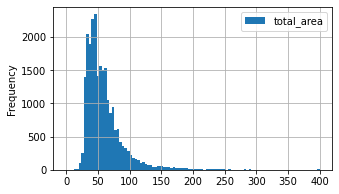

In [22]:
data.plot(y='total_area', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(0, 400)) # обшая площадт
data['total_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

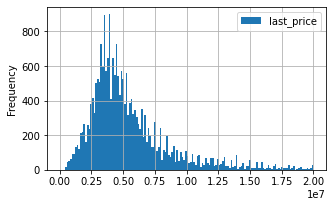

In [23]:
data.plot(y='last_price', kind='hist', figsize=(5, 3), grid=True, bins=150, range=(0, 20000000)) # цена
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

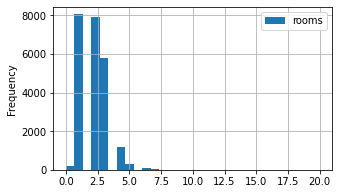

In [24]:
data.plot(y='rooms', kind='hist', figsize=(5, 3), grid=True, bins=30, range=(0, 20)) # число комнат
data['rooms'].describe()

count    23621.000000
mean         2.735933
std          0.995903
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

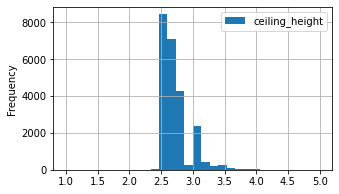

In [25]:
data.plot(y='ceiling_height', kind='hist', figsize=(5, 3), grid=True, bins=30, range=(1, 5)) # высота потолков
data['ceiling_height'].describe()

Вывод:
1. Общая площадь находится в диапазоне от 12 кв.м. до 900 кв.м. Среднее значение = 60 кв.м., медиана = 52 кв.м.
2. Средняя цена недвижимости составляет 6.5 млн. рублей, медиана = 4.6 млн. рублей
3. Больше всего представлено однокомнатных помещений. Число комнат составляет от 1 до 19
4. Средняя высота потолка составляет 2.7 м. В выборке также встречаются аномальные значения: максимальная высота потолка - 100 м. и минимальная - 1 м. Либо ошибка, либо недвижимость для великанов и гномов соответственно)

#### 4.2 Изучиние времени продажи квартиры. 

(1.0, 600.0)

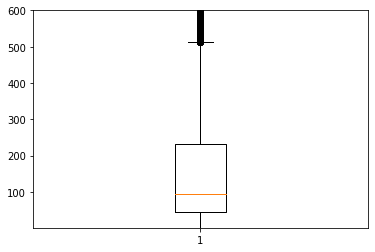

In [26]:
plt.boxplot(data[data['days_exposition'] != 'NaN']['days_exposition'])
plt.ylim(1,600)                                               

In [27]:
data[data['days_exposition'] != 'NaN']['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

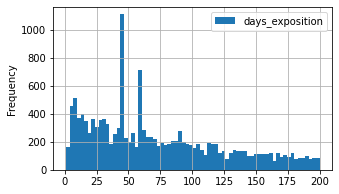

In [28]:
data.plot(y='days_exposition', kind='hist', figsize=(5, 3), grid=True, bins=70, range=(1, 200))

<AxesSubplot:ylabel='Frequency'>

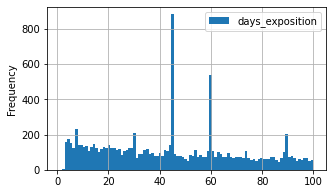

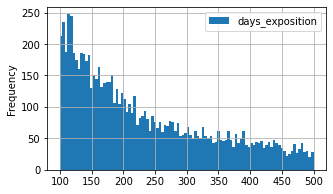

In [29]:
data.plot(y='days_exposition', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(1, 100))
data.plot(y='days_exposition', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(100, 500))

In [30]:
data['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1572      1
1396      1
1268      1
1252      1
1391      1
Name: days_exposition, Length: 1141, dtype: Int64

Вывод:
На первой гистограмме мы можем наблюдать распределение Пуассона. Среднее значение = 180 дней, а медиана = 95 дней.
На второй гистограмме можно увидет, что значения 7, 30, 45, 60 и 95 являются выбивающимися.
Согласно диаграммы размаха, межквартильный размах составляет от 45 до 232 дней. За пределами "усов" находятся значения от 510 до 1580, что является выбросами. Исходя их этого можно предположить, что диапазон необычно долгих продаж составляет от 510 дней, а быстрых - от 1 до 510 дней.   

#### 4.3 Уберем редкие и выбивающиеся значения.

In [31]:
wrong_values = [0, 7, 30, 45, 60, 95] # список выбивающихся значений
good_exposition = data.query('days_exposition not in @wrong_values') # срез значений
good_exposition['days_exposition'].describe()

count    18594.000000
mean       194.989513
std        226.097561
min          1.000000
25%         44.000000
50%        113.000000
75%        257.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 1000.0)

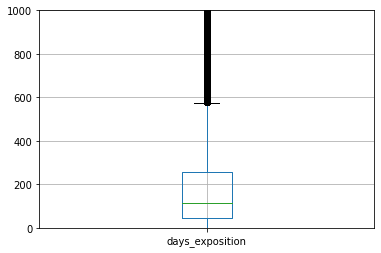

In [32]:
good_exposition.boxplot(column='days_exposition') # диаграмма размаха времени продаж
plt.ylim(0,1000)

<AxesSubplot:ylabel='Frequency'>

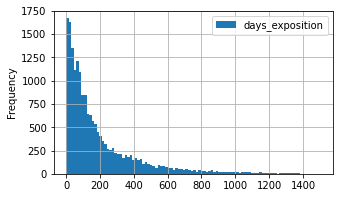

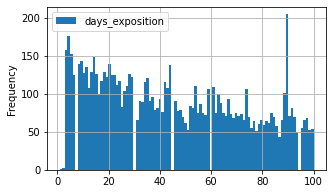

In [33]:
good_exposition.plot(y='days_exposition', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(1, 1500)) # гистограммы времени продаж
good_exposition.plot(y='days_exposition', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(1, 100))

In [34]:
good_exposition['days_exposition'].value_counts()

90      204
4       176
3       158
5       152
14      148
       ... 
1572      1
1396      1
1268      1
1252      1
1391      1
Name: days_exposition, Length: 1136, dtype: Int64

Вывод:
После исключения редких и выбивающихся значений среднее значение стало 194 дня, а медиана 113 дней вместо 180 и 95 соответственно. Межквартильный размах составляет от 44 до 257 дней. Нормальные значения располагаются в диапазоне от 1 до 580.    

#### 4.4 Изучиние зависимости цены от площади, числа комнат, удалённости от центра. Изучиние зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Зависимость от даты размещения: дня недели, месяца и года.

Зависимость цены от площади:

<AxesSubplot:xlabel='total_area'>

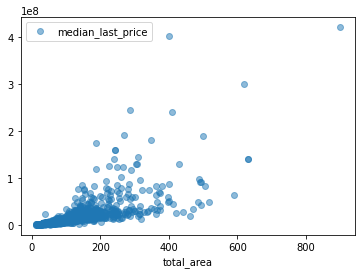

In [35]:
total_area_pivot2 = data.pivot_table(index='total_area', values='last_price', aggfunc='median') # сводная таблица
total_area_pivot2.columns = ['median_last_price'] # переименование столбца
total_area_pivot2.plot(y='median_last_price', style = 'o', alpha=0.5) # диаграмма рассеяния

In [36]:
print(data['total_area'].corr(data['last_price'])) # корреляция

0.6536750579657242


Вывод:
Коэффициент корреляции равен 0.6, что свидетельствует о зависимости цены от площади: чем выше площадь, тем выше цена.

Зависимость цены от числа комнат:

In [37]:
room_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
room_pivot.columns = ['count', 'median_last_price']
room_pivot

,count,median_last_price
rooms,,
0,197,2700000
1,8047,3600000
2,7940,4770169
3,5814,6200000
4,1180,9000000
5,326,14000000
6,105,19000000
7,59,24900000
8,12,23095000


Для корректного графика уберем количество комнат от 8 до 19, так как по ним мало данных.

<AxesSubplot:xlabel='rooms'>

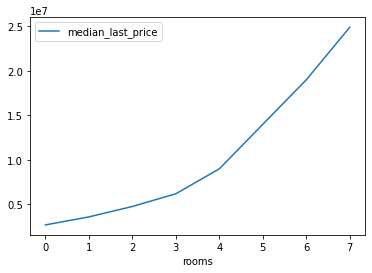

In [38]:
room_pivot.query('count > 12').plot(y='median_last_price')

In [39]:
print(data['rooms'].corr(data['last_price'])) # корреляция

0.3633428499648948


Коэффициент корреляции равен 0.3, что свидетельствует о зависимости цены от количества комнат: чем больше комнат, тем выше цена.

Зависимость цены от удалённости от центра:

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

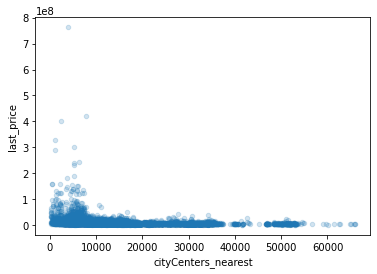

In [40]:
data.plot(y='last_price', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.2)

In [41]:
data['cityCenters_nearest'].corr(data['last_price'])

-0.20674734874298373

Мы видим отрицательный коэффициент корреляции, что говорит нам о том, что чем выше удаленность от центра, тем ниже цена.

Зависимость цены от того, на каком этаже расположена квартира: 

In [42]:
floor_pivot2 = data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
floor_pivot2.columns = ['median_last_price']
floor_pivot2

,median_last_price
floor_category,
другой,4850000
первый,3900000
последний,4300000


<AxesSubplot:xlabel='floor_category'>

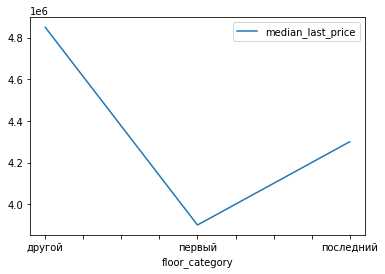

In [43]:
floor_pivot2.plot(y='median_last_price')

Вывод: Самая низкая цена у квартир, расположенных на первом этаже и последнем этаже.

Зависимость цены от даты размещения (дня недели):

In [44]:
pivot_weekday_exposition2 = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_weekday_exposition2.columns = ['count', 'median']
pivot_weekday_exposition2

,count,median
weekday_exposition,,
0,3612,4650000
1,4183,4730000
2,3974,4700000
3,4295,4650000
4,4000,4585000
5,1936,4555000
6,1699,4550000


<AxesSubplot:xlabel='weekday_exposition'>

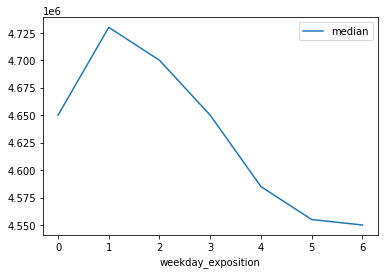

In [45]:
pivot_weekday_exposition2.plot(y='median')

Вывод:
В выходные дни наблюдается самая низкая цена в объявлениях, а ближе ко вторнику - самая высокая.

Зависимость цены от даты размещения (месяца):

In [46]:
pivot_month_exposition2 = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_month_exposition2.columns = ['count', 'median']
pivot_month_exposition2

,count,median
month_exposition,,
1,1500,4600000
2,2640,4650000
3,2587,4650000
4,2379,4800000
5,1274,4515000
6,1760,4400000
7,1695,4650000
8,1744,4570000
9,1981,4700000


<AxesSubplot:xlabel='month_exposition'>

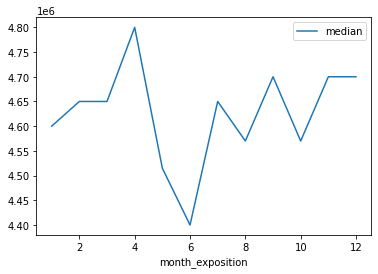

In [47]:
pivot_month_exposition2.plot(y='median')

Вывод:
Вывод: самая низкая цена на недвижимость наблюдается в мае и июне, а самая высокая - в апреле.

Зависимость цены от даты размещения (года):

In [48]:
pivot_year_exposition2 = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_year_exposition2.columns = ['count', 'median']
pivot_year_exposition2

,count,median
year_exposition,,
2014,137,7700000
2015,1191,5350000
2016,2783,4550000
2017,8190,4500000
2018,8519,4550000
2019,2879,5050000


<AxesSubplot:xlabel='year_exposition'>

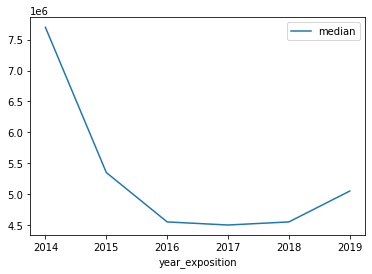

In [49]:
pivot_year_exposition2.plot(y='median')

Вывод:
Самая высокая цена была в начале 2014 году, однако, начиная с 2014 и по 2017 год цены на недвижимость падали. С 2018 года мы можем видеть рост цен.  

Зависимость цены квадратнноого метра от площади:

<AxesSubplot:xlabel='total_area'>

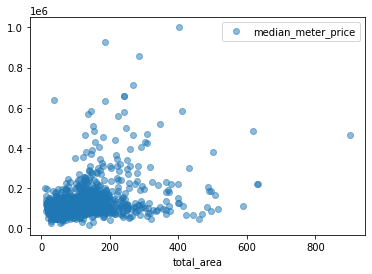

In [50]:
total_area_pivot = data.pivot_table(index='total_area', values='square_meter_price', aggfunc='median') # сводная таблица
total_area_pivot.columns = ['median_meter_price'] # переименование столбца
total_area_pivot.plot(y='median_meter_price', style = 'o', alpha=0.5) # диаграмма рассеяния

In [51]:
print(data['total_area'].corr(data['square_meter_price'])) # корреляция

0.30196021001472556


Вывод:
Коэффициент корреляции равен 0.3, что свидетельствует о зависимости цены от площади: чем выше площадь, тем выше цена.

Зависимость цены квадратнноого метра от числа комнат:

In [52]:
rooms_pivot = data.pivot_table(index='rooms', values='square_meter_price', aggfunc='median')

<AxesSubplot:xlabel='rooms'>

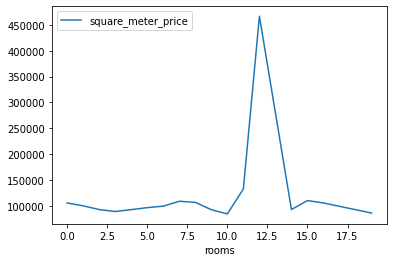

In [53]:
rooms_pivot.plot()

По графику видно, что в данных присутствуют аномолии, которые не дают сделать правильный вывод

In [54]:
rooms_pivot2 = data.pivot_table(index='rooms', values='square_meter_price', aggfunc=['count', 'median'])
rooms_pivot2.columns = ['count', 'median_square_meter_price']
rooms_pivot2


,count,median_square_meter_price
rooms,,
0,197,105555.555556
1,8047,100000.000000
2,7940,92796.569440
3,5814,88983.050847
4,1180,92666.666667
5,326,96517.068099
6,105,99411.764706
7,59,108827.085852
8,12,106760.191847


Для корректного графика уберем количество комнат от 8 до 19, так как по ним мало данных.

<AxesSubplot:xlabel='rooms'>

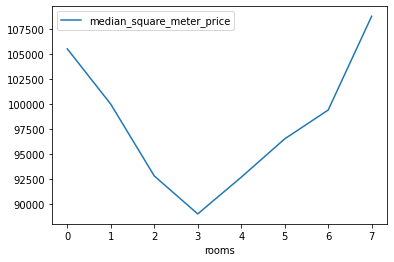

In [55]:
rooms_pivot2.query('count > 12').plot(y='median_square_meter_price')

Вывод:
стоимость квадратного метра в трехкомнатных квартирах самая низкая.

Зависимость цены квадратнноого метра от удалённости от центра:

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='square_meter_price'>

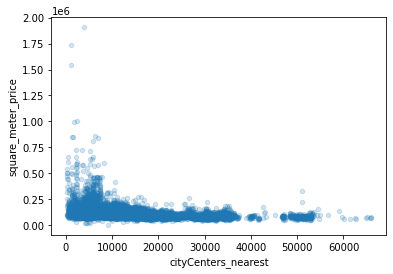

In [56]:
data.plot(y='square_meter_price', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.2)

In [57]:
data['cityCenters_nearest'].corr(data['square_meter_price'])

-0.3179507695934346

Мы видим отрицательный коэффициент корреляции, что говорит нам о том, что чем выше удаленность от центра, тем ниже цена квадратного метра.

Зависимость цены квадратнноого метра от того, на каком этаже расположена квартира: 

In [58]:
floor_pivot = data.pivot_table(index='floor_category', values='square_meter_price', aggfunc='median')
floor_pivot.columns = ['median_square_meter_price']
floor_pivot

,median_square_meter_price
floor_category,
другой,98275.862069
первый,81223.628692
последний,87777.777778


<AxesSubplot:xlabel='floor_category'>

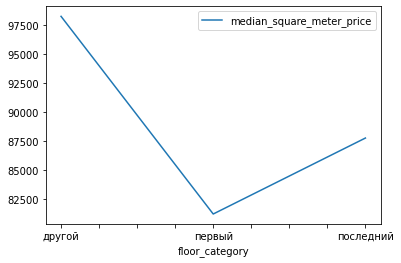

In [59]:
floor_pivot.plot(y='median_square_meter_price')

Вывод:
Самая низкая цена у квартир, расположенных на первом этаже и последнем этаже.

Зависимость цены квадратнноого метра от даты размещения (дня недели):

In [60]:
pivot_weekday_exposition = data.pivot_table(index='weekday_exposition', values='square_meter_price', aggfunc=['count', 'median'])
pivot_weekday_exposition.columns = ['count', 'median']
pivot_weekday_exposition

,count,median
weekday_exposition,,
0,3612,94688.910380
1,4183,95634.095634
2,3974,95473.807179
3,4295,95143.884892
4,4000,94616.160238
5,1936,93545.716727
6,1699,94501.718213


<AxesSubplot:xlabel='weekday_exposition'>

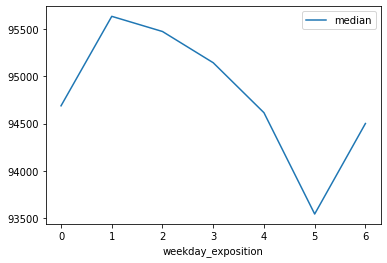

In [61]:
pivot_weekday_exposition.plot(y='median')

Вывод:
В выходные дни наблюдается самая низкая цена в объявлениях, а ближе ко вторнику самая высокая.

Зависимость цены квадратнноого метра от даты размещения (месяца):

In [62]:
pivot_month_exposition = data.pivot_table(index='month_exposition', values='square_meter_price', aggfunc=['count', 'median'])
pivot_month_exposition.columns = ['count', 'median']
pivot_month_exposition

,count,median
month_exposition,,
1,1500,95222.437478
2,2640,95000.000000
3,2587,95238.095238
4,2379,96451.612903
5,1274,92857.142857
6,1760,92799.539171
7,1695,95000.000000
8,1744,96026.315789
9,1981,95607.235142


<AxesSubplot:xlabel='month_exposition'>

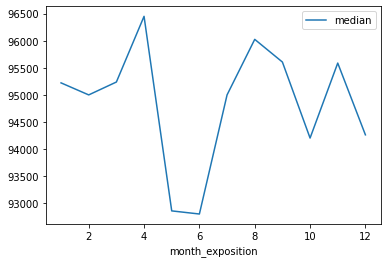

In [63]:
pivot_month_exposition.plot(y='median')

Вывод:
самая низкая цена на недвижимость наблюдается в мае и июне, а самая высокая - в апреле и августе.

Зависимость цены квадратнноого метра от даты размещения (года):

In [64]:
pivot_year_exposition = data.pivot_table(index='year_exposition', values='square_meter_price', aggfunc=['count', 'median'])
pivot_year_exposition.columns = ['count', 'median']
pivot_year_exposition

,count,median
year_exposition,,
2014,137,107000.000000
2015,1191,93414.634146
2016,2783,91743.119266
2017,8190,92565.088448
2018,8519,95689.655172
2019,2879,103305.785124


<AxesSubplot:xlabel='year_exposition'>

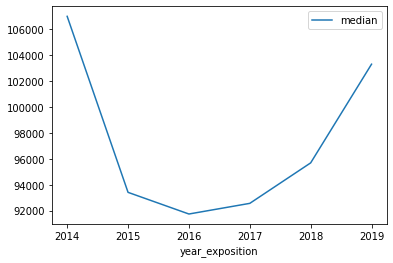

In [65]:
pivot_year_exposition.plot(y='median')

Вывод:
Самая высокая цена была в начале 2014 году, однако, в с 2014 до 2016 год цены на недвижимость падали. С 2016 года мы можем видеть рост цен.  

#### 4.5 10 населённых пунктов с наибольшим числом объявлений. Средняя цена квадратного метра в этих населённых пунктах. Населённые пункты с самой высокой и низкой стоимостью жилья среди них. 

In [66]:
top_locality_name = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
top_locality_name.columns = ['count', 'mean']
top_locality_name.sort_values(by='count', ascending=False).head(10) # 10 населённых пунктов с наибольшим числом объявлений

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Среди топ 10 населенных пунктов с наибольшим числом объявлений самая высокая цена наблюдается в Санкт-Петербурге(114 849 рублей за квадратный метр), а самя низкая в Выборге (58 141 рублей за квадратный метр).

#### 4.6 Квартиры в Санкт-Петербурге: область центра, средняя цена для каждого километра, зависииость цены от удалённости от центра. 

In [67]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(999999) # заменим пропуски на 999999, далее учитывать не будем

In [68]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest'] / 1000 # новый столбец с расстоянием до центра в км

In [69]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].astype('int') # округлим до целых значений

In [70]:
spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != 999999') # срез значений
spb = spb.pivot_table(index='cityCenters_nearest_in_km', values='square_meter_price') # сводная таблица

In [71]:
spb # средняя цена для каждого километра

,square_meter_price
cityCenters_nearest_in_km,
0,187324.130319
1,166603.755531
2,146662.860056
3,129416.344615
4,137475.497055
5,146979.232519
6,152277.893519
7,141399.731456
8,120581.349830


<AxesSubplot:xlabel='cityCenters_nearest_in_km'>

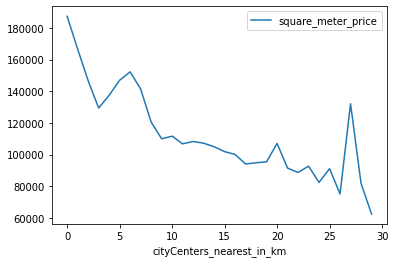

In [72]:
spb.plot() # график зависимости цены от удаленности от цента 

На основании полученного граффика центром можно считать расстояние до 3 км.

#### 4.7 Сегмент квартир в центре. Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [73]:
spb_centre = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in_km <= 3') # сегмент квартир в центре СПБ

Площадь:

count    1159.000000
mean       97.399172
std        55.772422
min        12.000000
25%        62.000000
50%        84.100000
75%       115.250000
max       517.000000
Name: total_area, dtype: float64

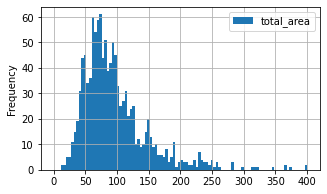

In [74]:
spb_centre.plot(y='total_area', kind='hist', figsize=(5, 3), grid=True, bins=100, range=(0, 400)) # обшая площадь
spb_centre['total_area'].describe()

Цена:

count    1.159000e+03
mean     1.602257e+07
std      3.292117e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.447000e+07
max      7.630000e+08
Name: last_price, dtype: float64

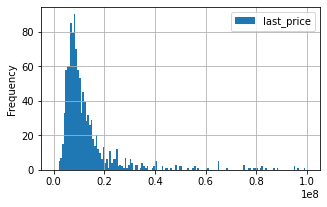

In [75]:
spb_centre.plot(y='last_price', kind='hist', figsize=(5, 3), grid=True, bins=150, range=(0, 100000000)) # цена
spb_centre['last_price'].describe()

Число комнат:

count    1159.000000
mean        3.104400
std         1.558964
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

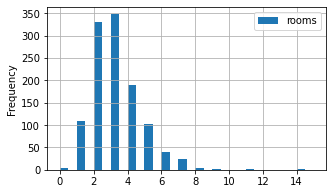

In [76]:
spb_centre.plot(y='rooms', kind='hist', figsize=(5, 3), grid=True, bins=30, range=(0, 15)) # число комнат
spb_centre['rooms'].describe()

Высота потолков:

count    1157.000000
mean        3.120000
std         1.166441
min         2.450000
25%         2.810000
50%         3.000000
75%         3.300000
max        32.000000
Name: ceiling_height, dtype: float64

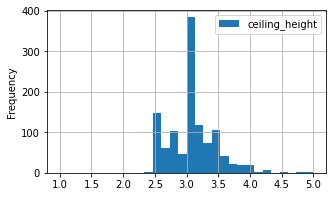

In [77]:
spb_centre.plot(y='ceiling_height', kind='hist', figsize=(5, 3), grid=True, bins=30, range=(1, 5)) # высота потолков
spb_centre['ceiling_height'].describe()

Вывод:
1. Общая площадь находится в диапазоне от 12 кв.м. до 517 кв.м. Среднее значение = 97 кв.м., медиана = 84 кв.м.
2. Средняя цена недвижимости составляет 1.6 млн. рублей, медиана = 9.5 млн. рублей
3. Больше всего представлено трехкомнатных квартир. Число комнат составляет от 1 до 19
4. Средняя высота потолка составляет 3.1 м. В выборке также встречаются аномальные значения: максимальная высота потолка - 32 м. 

<AxesSubplot:xlabel='total_area'>

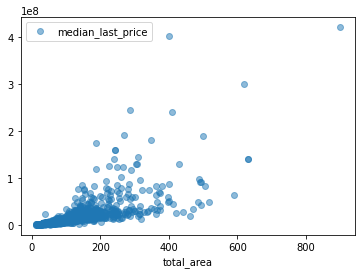

In [78]:
total_area_pivot = spb_centre.pivot_table(index='total_area', values='last_price', aggfunc='median') # сводная таблица
total_area_pivot2.columns = ['median_last_price'] # переименование столбца
total_area_pivot2.plot(y='median_last_price', style = 'o', alpha=0.5) # диаграмма рассеяния

In [79]:
print(spb_centre['total_area'].corr(spb_centre['last_price'])) # корреляция

0.5320175869595638


Коэффициент корреляции равен 0.5, что свидетельствует о зависимости цены от площади: чем выше площадь, тем выше цена.

Зависимость стоимости от числа комнат:

In [80]:
pivot_spd_rooms = spb_centre.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
pivot_spd_rooms.columns = ['count', 'median']
pivot_spd_rooms

,count,median
rooms,,
0,5,3100000
1,110,5350000
2,330,7500000
3,347,9350000
4,190,11745000
5,103,14200000
6,40,17700000
7,24,24950000
8,5,22190000


<AxesSubplot:xlabel='rooms'>

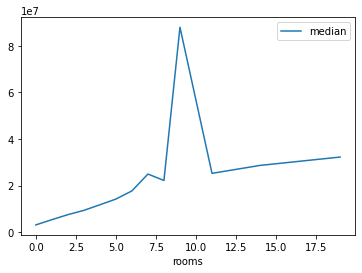

In [81]:
pivot_spd_rooms.plot(y='median')

0.24449833532356113

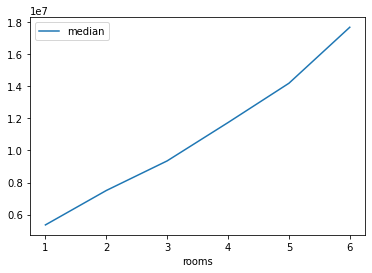

In [82]:
pivot_spd_rooms.query('count >= 40').plot(y='median')
spb_centre['rooms'].corr(spb_centre['last_price'])

Вывод:
Кофэффициент корреляции составляет 0.2, что говорит нам о зависимости стоимости от числа комнат: чем больше количество комнат, тем выше цена.

Зависимость стоимости от этажа:

In [83]:
pivot_spd_floor = spb_centre.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'median'])
pivot_spd_floor.columns = ['count', 'median']
pivot_spd_floor

,count,median
floor_category,,
другой,725,10000000
первый,164,7125000
последний,268,9400000


<AxesSubplot:xlabel='floor_category'>

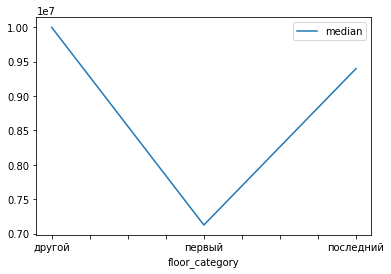

In [84]:
pivot_spd_floor.plot(y='median')

Вывод:
квартиры на первом этаже самые дешевые, отличий от основной выборки нет. 

Зависимость стоимости от удалённость от центра:

-0.0937817330711396

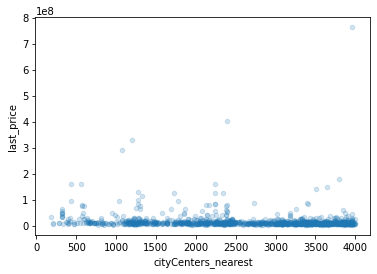

In [85]:
spb_centre.plot(y='last_price', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.2)
spb_centre['last_price'].corr(spb_centre['cityCenters_nearest'])

Вывод:
Коэфициент кареляци равено -0.09, так как в данном случае мы рассматриваем центр города (максимальное расстояние от центра - 3 км.). В данном случая наблюдается слабая зависимость цены от удаленности от центра на расстояние в 3 км.

Зависимость стоимости от дата размещения объявления(день):

In [86]:
pivot_weekday_spb = spb_centre.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_weekday_spb.columns = ['count', 'median']
pivot_weekday_spb

,count,median
weekday_exposition,,
0,170,9727500
1,189,9590000
2,194,10399000
3,251,9500000
4,212,9250000
5,76,8497500
6,67,9500000


<AxesSubplot:xlabel='weekday_exposition'>

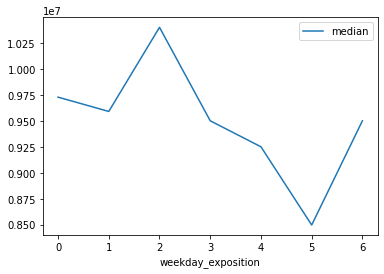

In [87]:
pivot_weekday_spb.plot(y='median')

Вывод:
Самые высокие цены в среду, а самые низкие - в субботу. В данном случае ситуация полность отличается от основной выборки.    

Зависимость стоимости от дата размещения объявления(месяц):

In [88]:
pivot_month_spb = spb_centre.pivot_table(index='month_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_month_spb.columns = ['count', 'median']
pivot_month_spb

,count,median
month_exposition,,
1,77,11250000
2,129,10000000
3,118,9950000
4,116,9425000
5,60,9095000
6,85,9500000
7,99,9500000
8,74,8850000
9,101,10500000


<AxesSubplot:xlabel='month_exposition'>

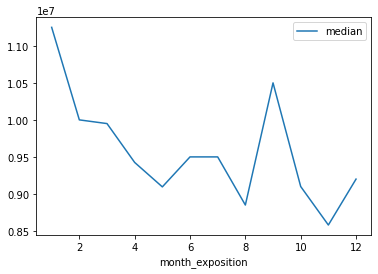

In [89]:
pivot_month_spb.plot(y='median')

Вывод:
Самые высокие цены в январе и сентябре, а самые низкие в августе и ноябре. Ситуация полностью отличается от общей выборки.

Зависимость стоимости от дата размещения объявления(год):

In [90]:
pivot_year_spb = spb_centre.pivot_table(index='year_exposition', values='last_price', aggfunc=['count', 'median'])
pivot_year_spb.columns = ['count', 'median']
pivot_year_spb

,count,median
year_exposition,,
2014,9,27250000
2015,118,10635000
2016,147,9900000
2017,418,8900000
2018,340,9400000
2019,127,10500000


<AxesSubplot:xlabel='year_exposition'>

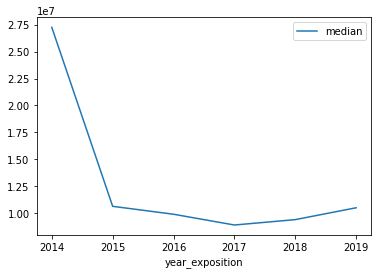

In [91]:
pivot_year_spb.plot(y='median')

Вывод:
Также как и в основной выборке, самые высокие цена на недвижимость были в 2014 года, после чего начался спад цен до 2017 года. С 2017 года цены на недвижимость растут. Общее - максимальные цены в 2014 году.

## Общий вывод

В ходе проведения работы мы изучили данные, заменили пропущенные значения, где они были необходимы, а также добавили новые значения: цену квадратного метра, расстояние до центра в киллометрах, день, месяц, год размещения объявления. В ходе исследования было изучено время продаж квартиры, площадь, цена, число комнат, высота потолков, которое показало, что:
- Общая площадь находится в диапазоне от 12 кв.м. до 900 кв.м. Среднее значение равно 60 кв.м., медиана равна 52 кв.м.
- Средняя цена недвижимости составляет 6.5 млн. рублей, медианая - 4.6 млн. рублей
- Больше всего в объявлениях представлено однокомнатных помещений. Число комнат составляет от 1 до 19
- Средняя высота потолка составляет 2.7 м.

Изучиние времени продажи квартиры:
- Нормальные значения продажи квартир варьируются от 1 до 580 дней.

Изучиние зависимости цены от площади, числа комнат, удалённости от центра, этажа, даты размещения объявления показало, что:
- Цена зависит от площади: чем выше площадь, тем выше цена. Коэффициент корреляции равен 0.6.
- Цена зависит от количества комнат: чем больше комнат, тем выше цена. Коэффициент корреляции равен 0.3
- Цена зависит от удаленности от цента: чем выше удаленность от центра, тем ниже цена. Коэффициент корреляции равен -0.2
- Самая низкая цена у квартир, расположенных на первом и последнем этаже.
- В выходные дни наблюдается самая низкая цена в объявлениях, а ближе ко вторнику - самая высокая.
- Самая низкая цена на недвижимость наблюдается в мае и июне, а самая высокая - в апреле.
- Самая высокая цена была в начале 2014 году, однако, начиная с 2014 и по 2017 год цены на недвижимость падали. С 2018 года мы можем видеть рост цен.    


Среди топ 10 населенных пунктов с наибольшим числом объявлений, самая высокая цена наблюдается в Санкт-Петербурге(114 849 рублей за квадратный метр), а самя низкая в Выборге (58 141 рублей за квадратный метр). На основании графика изменения цен в зависимости от удаления от центра Санкт-Петербурга мы выявили центр города в радиусе 3-х километров.

В ходе исследования была изучена площадь, цена, число комнат, высота потолков квартир в центре Санкт-Петербурга, которое показало, что:
- Общая площадь находится в диапазоне от 12 кв.м. до 517 кв.м. Среднее значение равно 97 кв.м., медиана равна 84 кв.м.
- Средняя цена недвижимости составляет 1.6 млн. рублей, медианная - 9.5 млн. рублей
- Больше всего представлено трехкомнатных квартир. Число комнат составляет от 1 до 19
- Средняя высота потолка составляет 3.1 м. 

Анализируя сегмент квартир в центре Санкт-Петербурга и сравнивая его с основной выборкой были найдены различия:
- Самые высокие цены, в зависимости от дня недели, наблюдаются в среду, а самые низкие - в субботу.
- Самые высокие цены, в зависимочти от месяца размещения объявления, наблюдаются в январе и сентябре, а самые низкие в августе и ноябре
